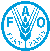

# Réalisation d'une étude de santé auprés de la FAO

Pour le réalisation de cette étude les fichiers sont extraits du site https://www.fao.org/faostat/fr/#data :

### Fichiers à analyser :
- Population
- Sous Nutitrion
- Disponibilité Alimentaire
- Aide Alimentaite

## Partie I - Importation et nettoyage des données

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####  Chargement des données

In [2]:
population = pd.read_csv("population.csv")
sous_nutrition = pd.read_csv("sous_nutrition.csv")
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")

In [3]:
sous_nutrition.describe() 
sous_nutrition['Valeur']=pd.to_numeric(sous_nutrition['Valeur'], errors = 'coerce')
sous_nutrition.fillna(0, inplace=True)

### I-1 Lecture du fichier population.csv

 Le fichier population contient:

- Le pays.
- L’année.
- La population du pays, exprimée en milliers d’habitants.

In [4]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [5]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [6]:
population.describe(include="all")

,Zone,Année,Valeur
count,1416,1416.000000,1.416000e+03
unique,236,NaN,NaN
top,Afghanistan,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.500000,3.144793e+04
std,NaN,1.708428,1.300812e+05
min,NaN,2013.000000,7.930000e-01
25%,NaN,2014.000000,3.783410e+02
50%,NaN,2015.500000,5.126480e+03
75%,NaN,2017.000000,1.930666e+04


In [7]:
population.shape

(1416, 3)

### <font color='MediumBlue'>  I-2 Nettoyage du Fichier population</font> 

In [8]:
# modifier le nom des colonnes 'Zone' et 'valeur' 
population.rename(columns={"Zone":"Pays","Valeur": "Nbr_habt", }, inplace=True)
population.head()

,Pays,Année,Nbr_habt
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [9]:
# La Population était en milliers, la mettre en nombre d'habitant
population["Nbr_habt"] *= 1000
population["Nbr_habt"] = population["Nbr_habt"].astype('int64')
population.head()

,Pays,Année,Nbr_habt
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


### I-3 Lecture du fichier sous_nutitrion.csv || insécurité alimentaire

Le fichier contient:

- Le pays.
- L'ntervalle d’années.
- Le nombre de personnes en sous-alimentation en millions d’habitants 

In [10]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [11]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1218 non-null   object 
 1   Année   1218 non-null   object 
 2   Valeur  1218 non-null   float64
dtypes: float64(1), object(2)
memory usage: 28.7+ KB


### <font color='MediumBlue'>   I-4 Nettoyage du Fichier sous_nutitrion || insécurité alimentaire</font>

In [12]:
# modifier les noms des colonnes 'Zone' et 'valeur' 
sous_nutrition.rename(columns={"Zone":"Pays","Valeur": "sous_nutrition", }, inplace=True)
# La sous nutrition étant en millions, la mettre en nombre d'habitant 
sous_nutrition["sous_nutrition"] *= 1000000
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"].astype('int64')
sous_nutrition.head()

,Pays,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000
1,Afghanistan,2013-2015,8800000
2,Afghanistan,2014-2016,8900000
3,Afghanistan,2015-2017,9700000
4,Afghanistan,2016-2018,10500000


### I-5 Lecture du fichier aide_alimentaire.csv


Le fichier contient les informatiopns suivantes:

- Le pays bénéficiaire.
- L’année.
- Le produit.
- La quantité qui a été donnée comme aide alimentaire, en tonnes.

In [13]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [14]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [15]:
aide_alimentaire.describe(include="all")

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.000000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.966780
std,NaN,0.946916,NaN,23339.531424
min,NaN,2013.000000,NaN,0.000000
25%,NaN,2013.000000,NaN,287.500000
50%,NaN,2014.000000,NaN,1178.000000
75%,NaN,2015.000000,NaN,4334.500000


### <font color='MediumBlue'>    I-6 Nettoyage du Fichier aide_alimentaire</font>

In [16]:
# modifier les noms des colonnes 'Pays bénéficiaire' et 'valeur' 
aide_alimentaire.rename(columns={"Pays bénéficiaire":"Pays","Valeur": "Aide_en_tonne", }, inplace=True)
aide_alimentaire.head()

,Pays,Année,Produit,Aide_en_tonne
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


### I-7 Lecture du fichier dispo_alimentaire.csv

In [17]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [18]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [19]:
dispo_alimentaire.describe(include="all")

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Inde,Abats Comestible,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,NaN,NaN,NaN,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000


### <font color='MediumBlue'>  I-8 Nettoyage du Fichier dispo_alimentaire</font> 

In [20]:
# modifier le noms des colonnes 
dispo_alimentaire.rename(columns={
  "Zone":"Pays","Aliments pour animaux":"aliments_animaux",
  "Autres Utilisations": "autres",
  "Disponibilité alimentaire (Kcal/personne/jour)": "dispo_ali_kcal_pers_j",
  "Disponibilité alimentaire en quantité (kg/personne/an)":"dispo_ali_qte_kg_pers_an",
  "Disponibilité de matière grasse en quantité (g/personne/jour)":"dispo_mg_qte_g_pers_j",
  "Disponibilité de protéines en quantité (g/personne/jour)":"dispo_pt_qte_g_pers_j",
  "Disponibilité intérieure":"dispo_inter",
  "Exportations - Quantité":"export_qte",
  "Importations - Quantité":"import_qte",
  "Variation de stock":"variation_stock",
}, inplace=True)
dispo_alimentaire.head()

,Pays,Produit,Origine,aliments_animaux,autres,dispo_ali_kcal_pers_j,dispo_ali_qte_kg_pers_an,dispo_mg_qte_g_pers_j,dispo_pt_qte_g_pers_j,dispo_inter,export_qte,import_qte,Nourriture,Pertes,Production,Semences,Traitement,variation_stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


# Partie II - MISSION (Marc)

## II-1 La proportion de personnes en état de sous-nutrition pour l’année 2017

In [21]:
# Création d'un df comportant année, pays et nombre d'habitant
pays_population2017 = population.loc[population['Année'] == 2017,["Pays", "Nbr_habt"]]

# Création d'un lien entre des colonnes population et sous nutritition
prop_sous_nutrition2017 = pd.merge(pays_population2017,
                                sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018',["Pays", "sous_nutrition"]],
                               on='Pays')
prop_sous_nutrition2017.head()

,Pays,Nbr_habt,sous_nutrition
0,Afghanistan,36296113,10500000
1,Afrique du Sud,57009756,3100000
2,Albanie,2884169,100000
3,Algérie,41389189,1300000
4,Allemagne,82658409,0


##  <font color='MediumBlue'>II-1 Résultat de la proportion de personnes en état de sous nutritition dans le monde pour l'année 2017</font>  

In [22]:
# calcul de la proportion de personnes en sous-nutrition
print("Proportion de personnes en état de sous nutrition :", "{:.2f}".format(prop_sous_nutrition2017['sous_nutrition'].sum()*100/prop_sous_nutrition2017['Nbr_habt'].sum()),"%")

Proportion de personnes en état de sous nutrition : 7.10 %


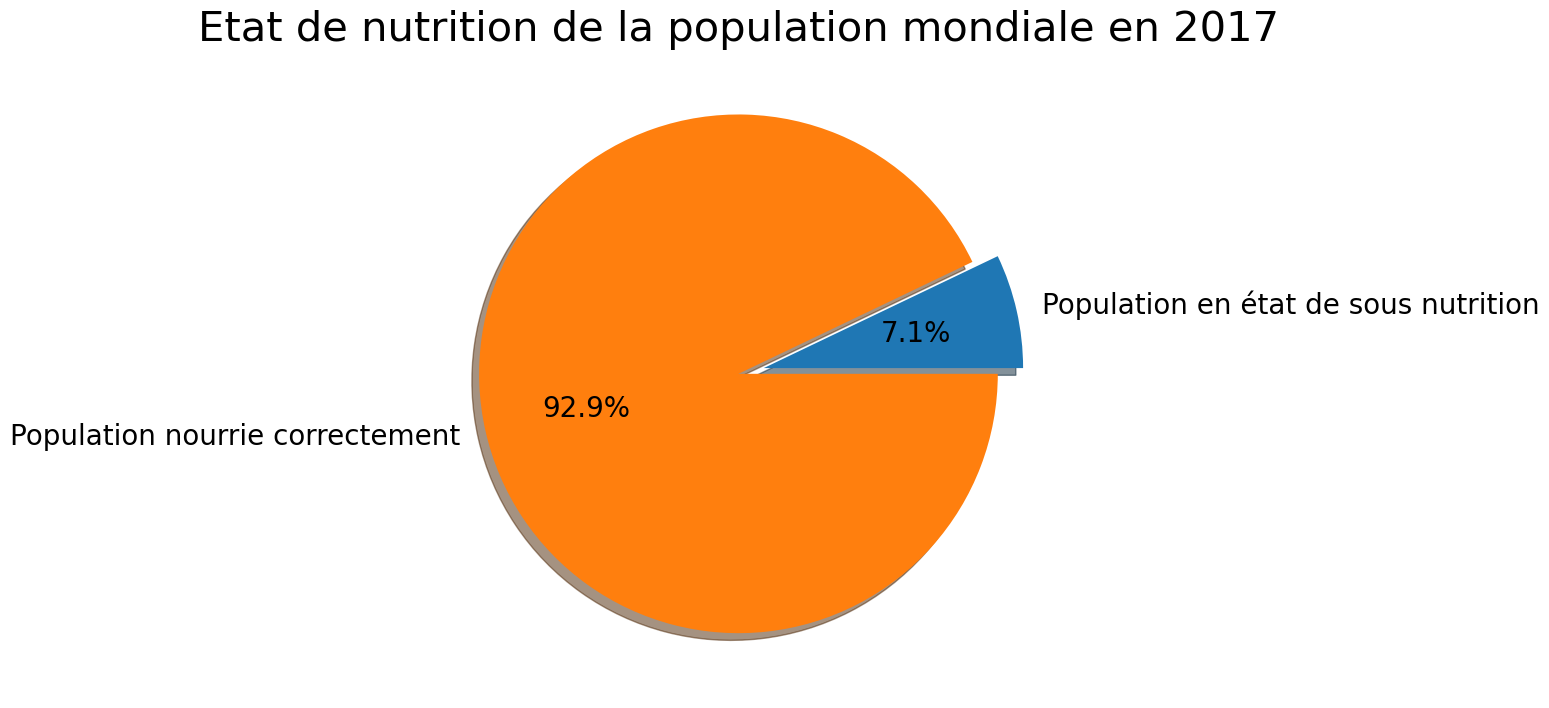

In [23]:
sous_prop = prop_sous_nutrition2017['sous_nutrition'].sum()*100/prop_sous_nutrition2017['Nbr_habt'].sum()

plt.figure(figsize=(15,15))
labels = ["Population en état de sous nutrition", "Population nourrie correctement"]
sizes = [sous_prop, 100-sous_prop]
explode = (0.1,0)
textprops = {"fontsize":20}
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Etat de nutrition de la population mondiale en 2017", fontsize=30)
plt.tight_layout()
plt.savefig("Proportion_nutrition_totale.png", dpi=200, bbox_inches = 'tight')
plt.show()

## II-2 Le nombre théorique de personnes qui pourraient être nourries en  2017. 

(Définir le calcul à partir de la disponibilité alimentaire)  
"Les besoins quotidiens d'une femme s'échelonnent ainsi entre 1 800 à 2 200 kcal alors qu'un homme devra consommer entre 2 400 à 2 700 kcal."

https://www.futura-sciences.com/sante/questions-reponses/nutrition-calories-femme-homme-besoins-differents-733/

In [24]:
# Créer un lien entre population et dispo alimentaire
pot_pers_nourries2017 = pd.merge(pays_population2017,dispo_alimentaire,on='Pays', how='inner')
pot_pers_nourries2017.head()

,Pays,Nbr_habt,Produit,Origine,aliments_animaux,autres,dispo_ali_kcal_pers_j,dispo_ali_qte_kg_pers_an,dispo_mg_qte_g_pers_j,dispo_pt_qte_g_pers_j,dispo_inter,export_qte,import_qte,Nourriture,Pertes,Production,Semences,Traitement,variation_stock
0,Afghanistan,36296113,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,36296113,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,36296113,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,36296113,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,36296113,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


##### Nombre mondiale de calories disponible par an

In [25]:
# Calculer le nombre total de calorie disponible mondialement
kcal_an = pot_pers_nourries2017['dispo_ali_kcal_pers_j'] * (pot_pers_nourries2017['Nbr_habt']) * 365
kcal_total = kcal_an.sum()


print("Le nombre mondiale de calorie est de :", " {:.0f}".format(kcal_total))

Le nombre mondiale de calorie est de :  7635429382287555


##### Population mondiale en 2017

In [26]:
# df de la population mondiale
pop_mondiale2017 = population.loc[population['Année'] == 2017,["Nbr_habt"]].sum()
pop_mondiale2017 = float(pop_mondiale2017)
pop_mondiale2017

7548134097.0

## <font color='MediumBlue'> II-2 Réponse au nombre théorique de personnes qui pourraient être nourries en 2017  </font>  

In [27]:
# Les besoins Théorique de calories pour un être humain par jour / 2500 kcal
kcal_pers = 2500

# disponibilité par personne
dispo_pers = kcal_total /(kcal_pers * 365)

print(" Le nombre théorique de personnes qui pourraient être nourries en 2017 est : ", "{:.0f}".format(dispo_pers))

 Le nombre théorique de personnes qui pourraient être nourries en 2017 est :  8367593844


### Le pourcentage mondiale de personnes qui pourraient etre nourries 2017

In [28]:
# Le pourcentage mondiale de personnes qui pourraient etre nourries 2017
print("La proportion de personnes qui pourraient etre nourries en 2017 est de :", "{:.0f}".format(dispo_pers*100/pop_mondiale2017),"%"  ,  "de la population mondiale")

La proportion de personnes qui pourraient etre nourries en 2017 est de : 111 % de la population mondiale


## II-3 La disponibilité alimentaire des produits végétaux

#### Créer le dataframe avec les données des produits végétaux et polpulation

In [29]:
# Choisir les donées relatives aux produits végétaux
dispo_vegetaux = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == 'vegetale', :]

# Jointure entre les tables 'dispo_vegetaux' et 'Nbr_habt' pour 2017'
pot_pers_nourries2017_vegetaux = pd.merge(dispo_vegetaux, pays_population2017, how = 'inner', on = 'Pays')

pot_pers_nourries2017_vegetaux.head()

,Pays,Produit,Origine,aliments_animaux,autres,dispo_ali_kcal_pers_j,dispo_ali_qte_kg_pers_an,dispo_mg_qte_g_pers_j,dispo_pt_qte_g_pers_j,dispo_inter,export_qte,import_qte,Nourriture,Pertes,Production,Semences,Traitement,variation_stock,Nbr_habt
0,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,36296113
1,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,36296113
2,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36296113
3,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,36296113
4,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,36296113


In [30]:
# Calculer le nombre total de kcal des produits végétaux en 2017
kcal_vegetaux_an = pot_pers_nourries2017_vegetaux['dispo_ali_kcal_pers_j'] * (pot_pers_nourries2017_vegetaux['Nbr_habt']) * 365
kcal_vegetaux_total = kcal_vegetaux_an.sum()

print(kcal_vegetaux_total)

6300178932059760.0


## <font color='MediumBlue'> II-3  Réponse à la disponibilité alimentaire des produits végétaux</font> 

In [31]:
# Calories nécessaires pour une personne par jour
kcal_pers = 2500

dispo_vegetaux_pers = kcal_vegetaux_total /(kcal_pers * 365)

print("Le nombre théorique de personnes qui pourraient être nourries par les produits végétaux en 2017  :", "{:.0f}".format(dispo_vegetaux_pers))

Le nombre théorique de personnes qui pourraient être nourries par les produits végétaux en 2017  : 6904305679


In [32]:
# Le pourcentage mondiale de personnes qui pourraient etre nourries 2017
print("La proportion de personnes qui pourraient etre nourries avec des produits végétaux en 2017 est de :") 
print( "{:.0f}".format(dispo_vegetaux_pers*100/pop_mondiale2017),"%"" de la population mondiale")

La proportion de personnes qui pourraient etre nourries avec des produits végétaux en 2017 est de :
91 % de la population mondiale


## II-4 L’utilisation de la disponibilité intérieure


### En particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

#### Proportion alimentation humaine

In [33]:
# Total alimentation humaine 
total_nourriture = dispo_alimentaire['Nourriture'].sum()
total_nourriture

4876258.0

In [34]:
# Disponibilité intérieure totale
dispo_inter_total = dispo_alimentaire['dispo_inter'].sum()
dispo_inter_total

9848994.0

In [35]:
# Proportion nourriture humaine
taux_ali_humaine = 100* (total_nourriture / dispo_inter_total)
taux_ali_humaine

49.51021393657058

#### Proportion alimentation animale

In [36]:
# Total alimentation animale
total_animale = dispo_alimentaire['aliments_animaux'].sum()

# Proportion alimentation animale
taux_ali_animal = 100* (total_animale / dispo_inter_total)
taux_ali_animal

13.242418464261426

#### Proportion des pertes

In [37]:
# Calcul du total des pertes
total_pertes = dispo_alimentaire['Pertes'].sum()

# Résultat de la proportion de pertes
taux_pertes = 100*(total_pertes / dispo_inter_total)
taux_pertes

4.606541541196999

## <font color='MediumBlue'>   II-4 Réponse à l’utilisation de la disponibilité intérieure</font>


In [38]:
print(" La disponibilité intérieure utilisée pour l'alimentation est de   :", "{:.2f}".format(taux_ali_humaine),"%",)
print(" La disponibilité intérieure utilisée pour l'alimentation animale est de  :"," {:.2f}".format(taux_ali_animal),"%",)    
print(" La disponibilité perdue est de :"," {:.2f}".format(taux_pertes),"%",) 

 La disponibilité intérieure utilisée pour l'alimentation est de   : 49.51 %
 La disponibilité intérieure utilisée pour l'alimentation animale est de  :  13.24 %
 La disponibilité perdue est de :  4.61 %


In [39]:
df_dispo_alimentaire = [["taux_ali_humaine",round(taux_ali_humaine,2)], ["taux_ali_animal",round(taux_ali_animal,2)], ["taux_pertes",round(taux_pertes,2)]]
df_util_dispo_int = pd.DataFrame(df_dispo_alimentaire, columns=['taux_alimentation', 'proportion'])
df_util_dispo_int

,taux_alimentation,proportion
0,taux_ali_humaine,49.51
1,taux_ali_animal,13.24
2,taux_pertes,4.61


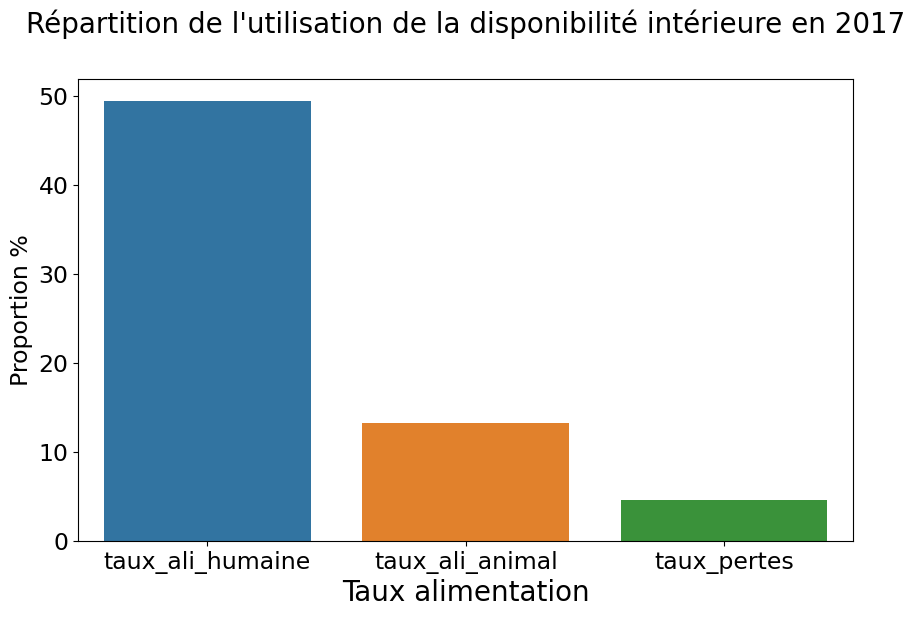

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='taux_alimentation', y = 'proportion', data = df_util_dispo_int )
plt.xlabel("Taux alimentation",fontsize = 20, color = 'black')
plt.ylabel('Proportion %', fontsize = 17, color = 'black')
plt.title("Répartition de l'utilisation de la disponibilité intérieure en 2017", fontsize = 20, color = 'black',y =1.08)
plt.tick_params(axis = "both", labelsize=17)
nouveaux_xticks = ["pour_humaine", "pour_animaux", "pertes"]
plt.savefig("rep_utilisation_dispo_int_2017.png", dpi=200, bbox_inches = 'tight')


# Partie III - MISSION (Julien)

## III-1 Lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes 
Utilisations de la disponibilité intérieure, qui peut s’exprimer avec une équation du type :
A1 + A2 + … = disponibilité intérieure = B1 + B2 + …

#### ressources = disponibilité intérieure = utilisations  
    ressources = Production + import_qte - export_qte + variation_stock  
    utilisations = Nourriture + aliments_animaux + autres + Pertes + Semences + Traitement

#### Créer le dataframe avec les données des 10 variables en ajoutant, pays et disponibilité intérieure

In [41]:
#Créer le dataframe avec les données aux 10 variables, pays et disponibilité intérieure
dispo_inter_reel = dispo_alimentaire[["Pays","aliments_animaux","autres",
"dispo_inter","export_qte","import_qte","Nourriture","Pertes","Production","Semences","Traitement","variation_stock"]].copy()

dispo_inter_reel.head()

,Pays,aliments_animaux,autres,dispo_inter,export_qte,import_qte,Nourriture,Pertes,Production,Semences,Traitement,variation_stock
0,Afghanistan,NaN,NaN,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,NaN,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


#### Mise en place de l'équation

In [42]:
#Créer le dataframe avec les données aux 10 variables
dispo_inter_reel['dispo_inter_ressources'] = dispo_inter_reel['Production'] + dispo_inter_reel['import_qte'] - dispo_inter_reel['export_qte'] + dispo_inter_reel['variation_stock'] 
dispo_inter_reel['dispo_inter_utilisations'] = dispo_inter_reel['Nourriture'] + dispo_inter_reel['aliments_animaux'] - dispo_inter_reel['autres'] + dispo_inter_reel['Pertes']+ dispo_inter_reel['Semences']+ dispo_inter_reel['Traitement'] 

dispo_inter_reel.head()

,Pays,aliments_animaux,autres,dispo_inter,export_qte,import_qte,Nourriture,Pertes,Production,Semences,Traitement,variation_stock,dispo_inter_ressources,dispo_inter_utilisations
0,Afghanistan,NaN,NaN,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,NaN,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Tableau des ressources par pays

In [43]:
# Tableau regroupant les disponibilités interieur, ressources intérieur et l'utilisations
dispo_inter_reel_total = dispo_inter_reel[["Pays", "dispo_inter", "dispo_inter_ressources", "dispo_inter_utilisations"]].groupby('Pays').sum().astype('int64')
dispo_inter_reel_total.head()

,dispo_inter,dispo_inter_ressources,dispo_inter_utilisations
Pays,,,
Afghanistan,13515,248,0
Afrique du Sud,61256,32896,12412
Albanie,4758,3863,456
Algérie,42630,39697,7820
Allemagne,162275,119614,28986


## <font color='MediumBlue'>  Ressources mondiales</font> 

In [44]:
# Mise à l'échelle mondiale
total_utilisation = dispo_inter_reel_total["dispo_inter_utilisations"].sum()
total_stock = dispo_inter_reel_total["dispo_inter_ressources"].sum()
total_dispo_inter = dispo_inter_reel_total["dispo_inter"].sum()

print("L'utilisation est de :","{:.0f}".format(total_utilisation))
print("Le stock des ressources mondiale est de  :","{:.0f}".format(total_stock))
print("La diponibilité  est de :","{:.0f}".format(total_dispo_inter))

L'utilisation est de : 1368032
Le stock des ressources mondiale est de  : 6227056
La diponibilité  est de : 9848994


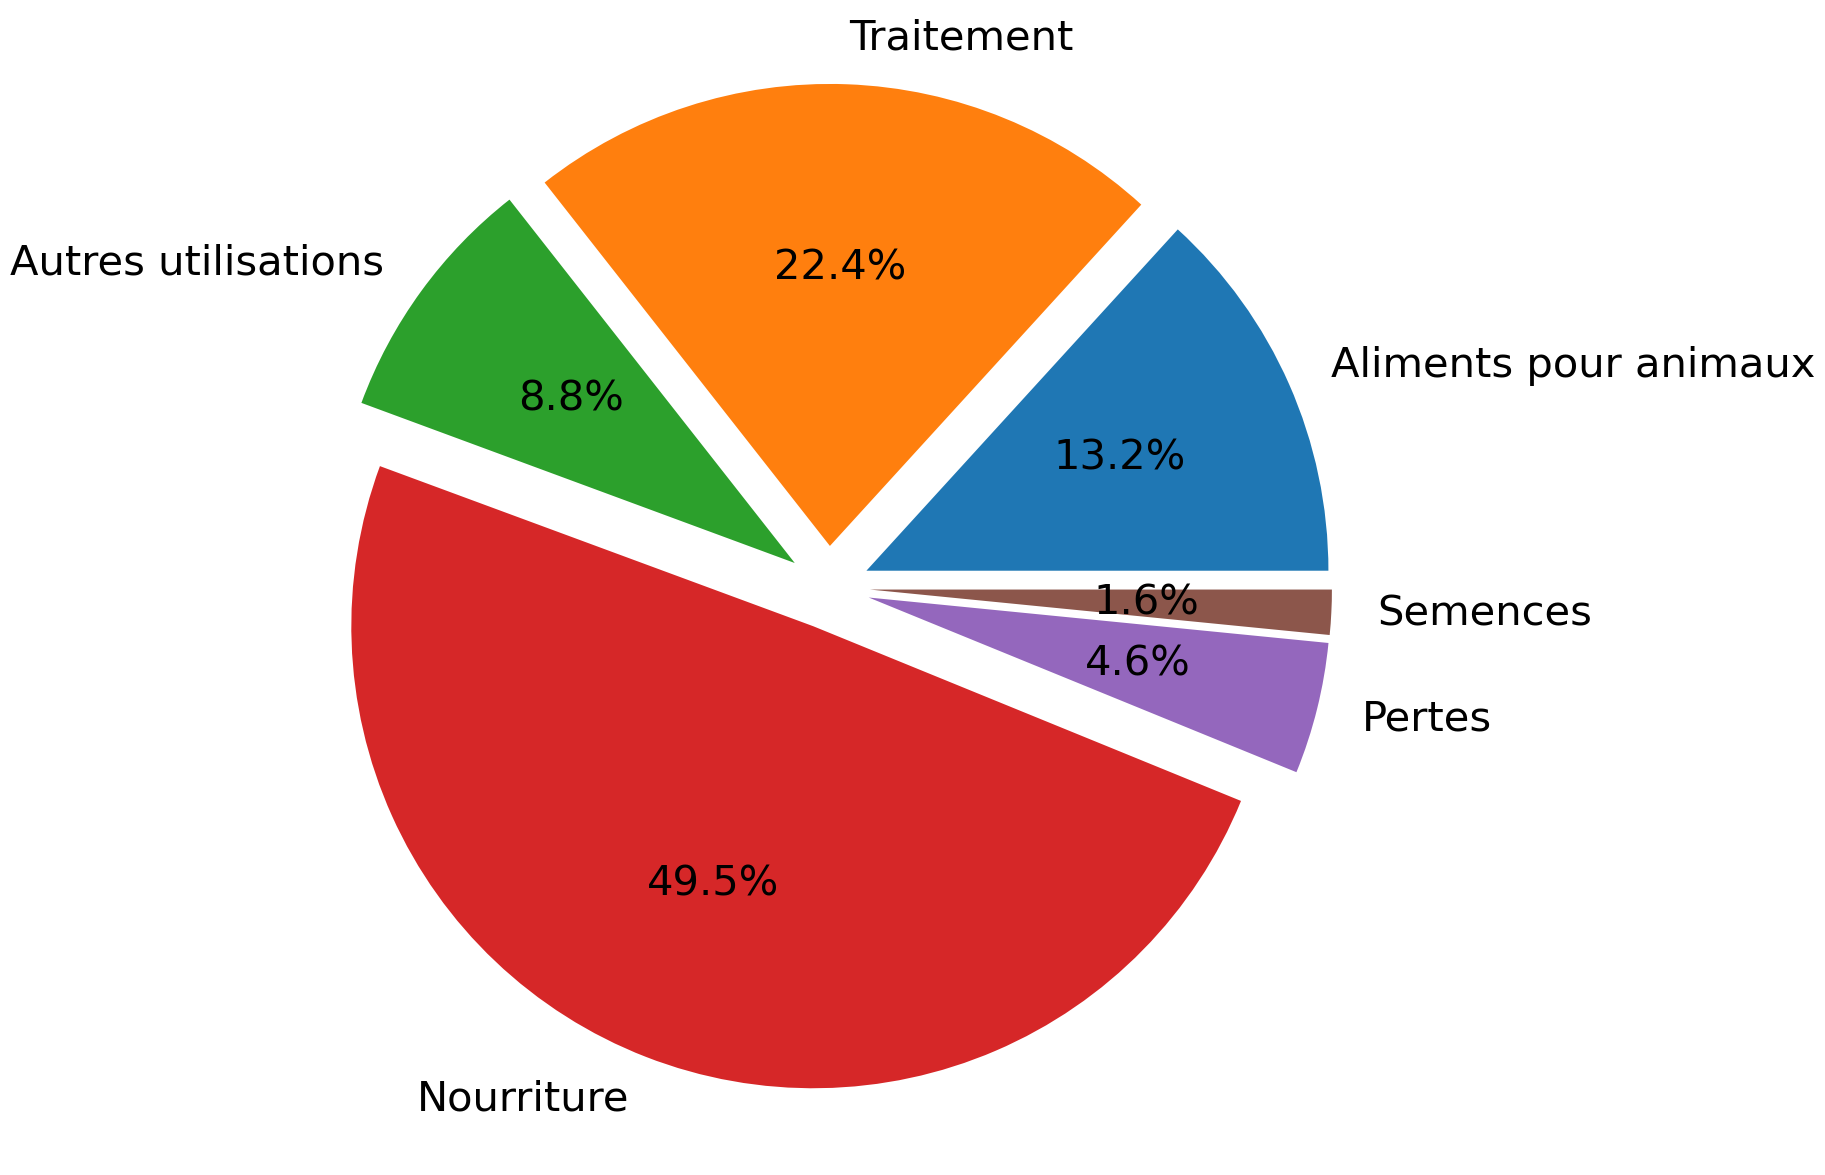

In [45]:
plt.figure(figsize=(15,15))
labels = ["Aliments pour animaux", "Traitement","Autres utilisations", "Nourriture", "Pertes", "Semences" ]
sizes= [(dispo_inter_reel['aliments_animaux'].sum()/dispo_alimentaire['dispo_inter'].sum())*100, 
        (dispo_inter_reel['Traitement'].sum()/dispo_alimentaire['dispo_inter'].sum())*100,
        (dispo_inter_reel['autres'].sum()/dispo_alimentaire['dispo_inter'].sum())*100, 
        (dispo_inter_reel['Nourriture'].sum()/dispo_alimentaire['dispo_inter'].sum())*100, 
        (dispo_inter_reel['Pertes'].sum()/dispo_alimentaire['dispo_inter'].sum())*100, 
        (dispo_inter_reel['Semences'].sum()/dispo_alimentaire['dispo_inter'].sum())*100]
explode = (0.09,0.09,0.09,0.09,0.09,0.09)
textprops = {"fontsize":30}
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', textprops=textprops)
#plt.title("Utilisation de la disponibilité intérieure en 2013", fontsize=30)
plt.savefig("dispo_int_2013.png", dpi=200, bbox_inches = 'tight')

## III-2 L’utilisation des céréales et la répartition entre l’alimentation humaine et l’alimentation pour animaux

In [46]:
# Création de la liste des Céréales
liste_cereales = ["Avoine","Blé","Céréales, Autres","Maïs","Millet","Orge","Riz (Eq Blanchi)","Seigle","Sorgnho"]

list_cereales =['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres']
df_cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(list_cereales)]

#création d'un Data Frame liste alimentaire
df_liste_alimentaire = dispo_alimentaire[["Pays","Produit","aliments_animaux", "Nourriture", "dispo_inter"]]

# Ajout d'une colone correspondant à la liste des céréales dans le nouveau Data Frame
df_liste_alimentaire = df_liste_alimentaire[df_liste_alimentaire['Produit'].isin(liste_cereales)]
df_liste_alimentaire.head()

,Pays,Produit,aliments_animaux,Nourriture,dispo_inter
7,Afghanistan,Blé,NaN,4895.0,5992.0
12,Afghanistan,"Céréales, Autres",NaN,0.0,0.0
32,Afghanistan,Maïs,200.0,76.0,313.0
34,Afghanistan,Millet,NaN,12.0,13.0
40,Afghanistan,Orge,360.0,89.0,524.0


In [47]:
#Calculer la proportion d'utilisation des céréales pour l'alimentation humaine et animal dans le monde
df_cereales = df_liste_alimentaire.groupby("Produit").sum().astype('int64')
df_cereales.reset_index(drop=False, inplace=True)
df_cereales.head()

,Produit,aliments_animaux,Nourriture,dispo_inter
0,Avoine,16251,3903,23407
1,Blé,129668,457824,679498
2,"Céréales, Autres",19035,5324,27485
3,Maïs,546116,125184,955799
4,Millet,3306,23040,29911


## <font color='MediumBlue'>  III-2 Réponse à l’utilisation des céréales et la répartition entre l’alimentation humaine et l’alimentation pour animaux  </font>

In [48]:
print("Proportion d'alimentation animale :", "{:.2f}".format(df_cereales['aliments_animaux'].sum()*100/df_cereales['dispo_inter'].sum()), "%")
print("Proportion d'alimentation pour les humains :", "{:.2f}".format(df_cereales['Nourriture'].sum()*100/df_cereales['dispo_inter'].sum()), "%")

Proportion d'alimentation animale : 36.14 %
Proportion d'alimentation pour les humains : 42.78 %


In [49]:
# Création de la liste des Céréales
liste_cereales = ["Avoine","Blé","Céréales, Autres","Maïs","Millet","Orge","Riz (Eq Blanchi)","Seigle","Sorgnho"]

list_cereales =['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres']
df_cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(list_cereales)]

#création d'un Data Frame liste alimentaire
df_liste_alimentaire = dispo_alimentaire[["Pays","Produit","aliments_animaux", "Nourriture", "dispo_inter"]]

# Ajout d'une colone correspondant à la liste des céréales dans le nouveau Data Frame
df_liste_alimentaire = df_liste_alimentaire[df_liste_alimentaire['Produit'].isin(liste_cereales)]
df_liste_alimentaire.head()

,Pays,Produit,aliments_animaux,Nourriture,dispo_inter
7,Afghanistan,Blé,NaN,4895.0,5992.0
12,Afghanistan,"Céréales, Autres",NaN,0.0,0.0
32,Afghanistan,Maïs,200.0,76.0,313.0
34,Afghanistan,Millet,NaN,12.0,13.0
40,Afghanistan,Orge,360.0,89.0,524.0


## III-3 Utilisation du manioc par la Thaïlande


 aux égards de la proportion de personnes en sous-nutrition
 l’exportation par rapport à la production

###  a.Calcul de la proportion de personnes sous alimenter en Thailand

In [50]:
# Tableau représentant les pays avec leur population et le nombre d'habitants en sous nutritition
prop_sous_nutrition2017.head()

,Pays,Nbr_habt,sous_nutrition
0,Afghanistan,36296113,10500000
1,Afrique du Sud,57009756,3100000
2,Albanie,2884169,100000
3,Algérie,41389189,1300000
4,Allemagne,82658409,0


In [51]:
# Tableau focalisé sur la Thaïlande
pop_Thailand = prop_sous_nutrition2017.loc[prop_sous_nutrition2017['Pays'] == 'Thaïlande',:]
pop_Thailand

,Pays,Nbr_habt,sous_nutrition
185,Thaïlande,69209810,6200000


###  <font color='MediumBlue'>   a.Résultat  de la proportion de personnes sous alimenter en Thaïlande</font>

In [52]:
# Proportion du peuple Thaïlandais en sous nutritition
propo_thai_sn = pop_Thailand["sous_nutrition"]*100/pop_Thailand["Nbr_habt"]
propo_thai_sn = float(propo_thai_sn)

print("La proportion de personnes en Thaïlande en sous nutritrion est de :","{:.2f}".format(propo_thai_sn),"%")

La proportion de personnes en Thaïlande en sous nutritrion est de : 8.96 %


### b. L’exportation par rapport à la production en Thaïlande

In [53]:
# Nouveau tableau comportant les pays, Produit, exportation, Producuction et la nourriture
df_thailand = dispo_alimentaire[["Pays","Produit","export_qte","Production","Nourriture"]]
df_thailand

,Pays,Produit,export_qte,Production,Nourriture
0,Afghanistan,Abats Comestible,NaN,53.0,53.0
1,Afghanistan,"Agrumes, Autres",2.0,3.0,39.0
2,Afghanistan,Aliments pour enfants,NaN,NaN,2.0
3,Afghanistan,Ananas,NaN,NaN,0.0
4,Afghanistan,Bananes,NaN,NaN,82.0
...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,NaN,2.0,3.0
15601,Îles Salomon,Viande de Volailles,NaN,0.0,2.0
15602,Îles Salomon,"Viande, Autre",NaN,NaN,0.0
15603,Îles Salomon,Vin,0.0,NaN,0.0


In [54]:
# Tableau focalisé sur la Thaïlande et le Manioc
manioc_thailande = df_thailand.loc[(df_thailand ['Pays']=='Thaïlande') & (df_thailand['Produit']== 'Manioc'),:]
manioc_thailande                                                         

,Pays,Produit,export_qte,Production,Nourriture
13809,Thaïlande,Manioc,25214.0,30228.0,871.0


### <font color='MediumBlue'>   b. Résultat de l’exportation par rapport à la production en Thaïlande</font>

In [55]:
#Calcul de la proportion du maniocs pour l'exportation et l'alimentation humaine en Thaïlande
prop_thailande_nourriture = 100*manioc_thailande['Nourriture']/manioc_thailande['Production']
prop_thailande_export = 100*manioc_thailande['export_qte']/manioc_thailande['Production']

prop_thailande_nourriture = float(prop_thailande_nourriture)
prop_thailande_export = float(prop_thailande_export)


print("La proportion en Thaïlande de personnes en sous nutritrion est de  :", "{:.2f}".format(propo_thai_sn),"%")
print("La proportion en Thaïlande de consomation du Manioc est de :", "{:.2f}".format(prop_thailande_nourriture),"%")
print("La proportion en Thaïlande d'exportation du Manioc est de  :", "{:.2f}".format(prop_thailande_export),"%")

La proportion en Thaïlande de personnes en sous nutritrion est de  : 8.96 %
La proportion en Thaïlande de consomation du Manioc est de : 2.88 %
La proportion en Thaïlande d'exportation du Manioc est de  : 83.41 %


In [56]:
# Résultat en tableau
thai_resultat = [[propo_thai_sn,prop_thailande_nourriture,prop_thailande_export]]
df_thai_resultat = pd.DataFrame(thai_resultat, columns=["propo_thai_sn","prop_thailande_nourriture","prop_thailande_export"])
df_thai_resultat

,propo_thai_sn,prop_thailande_nourriture,prop_thailande_export
0,8.958268,2.881434,83.41273


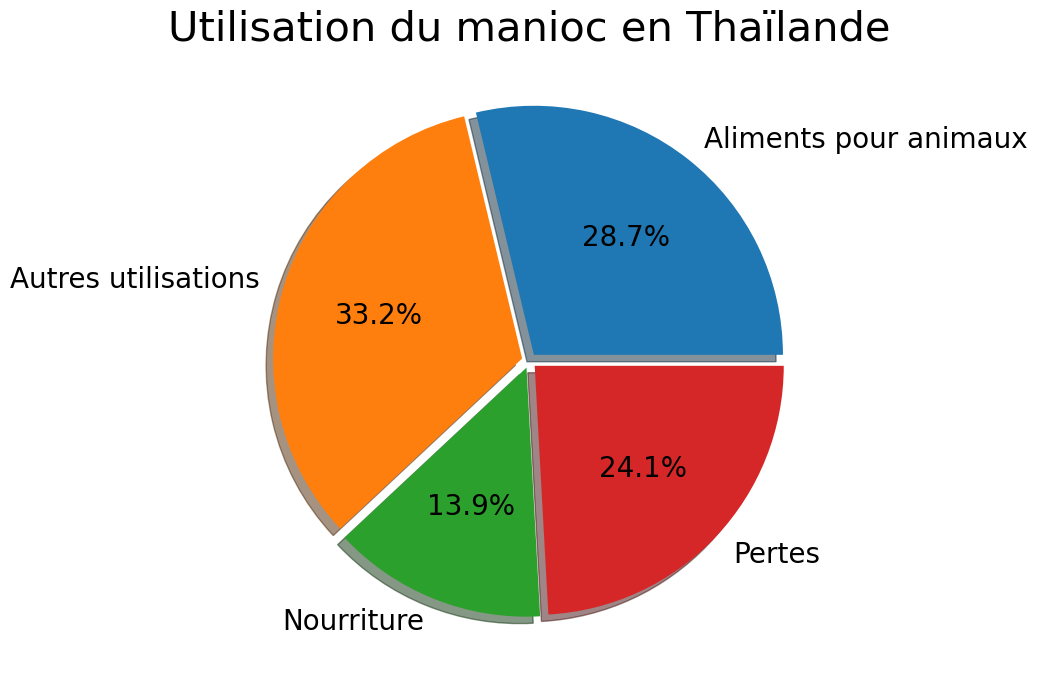

In [57]:
dispo_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Produit'] == "Manioc") & (dispo_alimentaire['Pays'] == "Thaïlande")]

plt.figure(figsize=(10,10))

labels = ["Aliments pour animaux", "Autres utilisations", "Nourriture", "Pertes"]
sizes = [(dispo_manioc['aliments_animaux'].sum()/dispo_manioc['dispo_inter'].sum())*100, 
        (dispo_manioc['autres'].sum()/dispo_manioc['dispo_inter'].sum())*100, 
        (dispo_manioc['Nourriture'].sum()/dispo_manioc['dispo_inter'].sum())*100, 
        (dispo_manioc['Pertes'].sum()/dispo_manioc['dispo_inter'].sum())*100 ]
explode = (0.03,0.03,0.03,0.03)
textprops = {"fontsize":20}
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Utilisation du manioc en Thaïlande", fontsize=30)
plt.savefig("manioc_thai.png", dpi=200, bbox_inches = 'tight')
plt.tight_layout()
plt.show()

# Partie IV - MISSION (Mélanie)

## IV- 1 Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [58]:
# utilisation du df comportant les pays, nombre d'habitant et les personnes en sous nutritition pour l'année 2017
prop_sous_nutrition2017.head()

,Pays,Nbr_habt,sous_nutrition
0,Afghanistan,36296113,10500000
1,Afrique du Sud,57009756,3100000
2,Albanie,2884169,100000
3,Algérie,41389189,1300000
4,Allemagne,82658409,0


In [59]:
# Proportion de la population sous-alimentée par pays

# Ajoute une nouvelle colonne "prop_sous_ali"
prop_sous_nutrition2017['prop_sous_ali'] = 100*(prop_sous_nutrition2017['sous_nutrition'] / prop_sous_nutrition2017['Nbr_habt'])
prop_sous_nutrition2017.head()

,Pays,Nbr_habt,sous_nutrition,prop_sous_ali
0,Afghanistan,36296113,10500000,28.928718
1,Afrique du Sud,57009756,3100000,5.437666
2,Albanie,2884169,100000,3.467203
3,Algérie,41389189,1300000,3.140917
4,Allemagne,82658409,0,0.000000


In [60]:
# Calul de la proportion de la population sous-alimentée par zone
proportion_sous_alimentes = prop_sous_nutrition2017.sort_values(by='prop_sous_ali', ascending=False).head(10)
proportion_sous_alimentes

,Pays,Nbr_habt,sous_nutrition,prop_sous_ali
78,Haïti,10982366,5300000,48.259182
157,République populaire démocratique de Corée,25429825,12000000,47.188685
108,Madagascar,25570512,10500000,41.062924
103,Libéria,4702226,1800000,38.279742
100,Lesotho,2091534,800000,38.249438
183,Tchad,15016753,5700000,37.957606
161,Rwanda,11980961,4200000,35.055619
121,Mozambique,28649018,9400000,32.810898
186,Timor-Leste,1243258,400000,32.173531
0,Afghanistan,36296113,10500000,28.928718


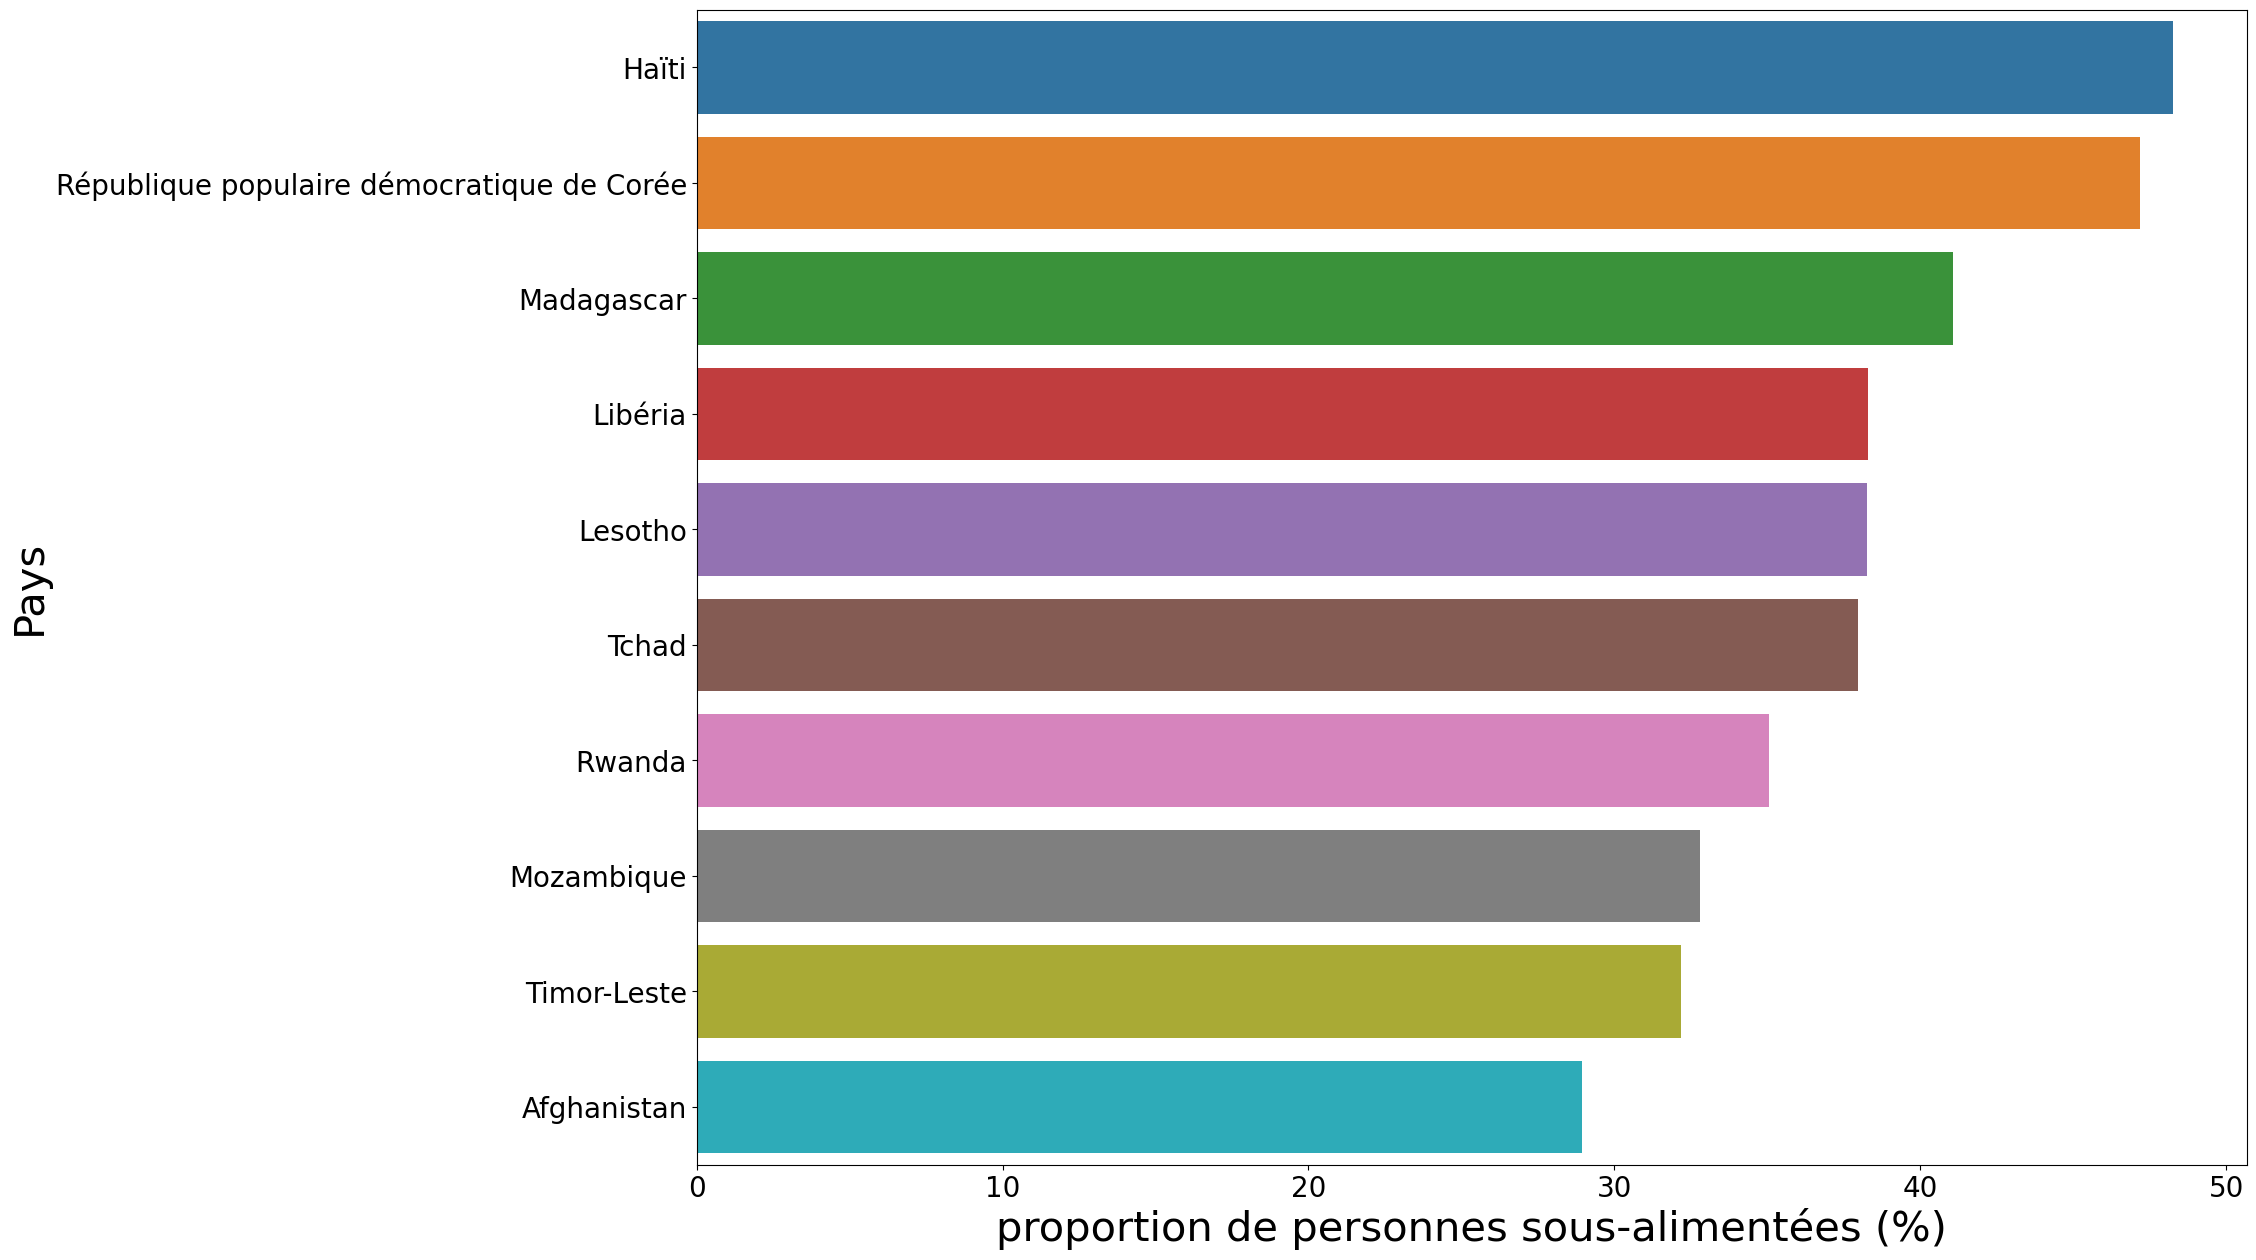

In [61]:
plt.figure(figsize=(20,15))
sns.barplot(x='prop_sous_ali', y = 'Pays', data = proportion_sous_alimentes )
plt.xlabel('proportion de personnes sous-alimentées (%)', fontsize = 30, color = 'black',y =1.03)
plt.ylabel('Pays', fontsize = 30, color = 'black')
#plt.title('Top 10 des pays sous-alimentés en 2017', fontsize = 30, color = 'black')
plt.savefig("top10_pays_sous_ali_2017.png", dpi=200, bbox_inches = 'tight')
plt.tick_params(axis = "both", labelsize=20)

## IV- 2 Les pays qui ont le plus bénéficié d’aide depuis 2013

In [62]:
aide_alimentaire

,Pays,Année,Produit,Aide_en_tonne
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [63]:
aide_pays = aide_alimentaire[['Pays', 'Aide_en_tonne']].groupby('Pays').sum()
top10_aide = aide_pays.sort_values(by='Aide_en_tonne', ascending=False).head(10)
top10_aide

,Aide_en_tonne
Pays,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


## IV- 3 Les pays qui ont le plus et le moins de disponibilité/habitant, etc

In [64]:
dispo_alimentaire

,Pays,Produit,Origine,aliments_animaux,autres,dispo_ali_kcal_pers_j,dispo_ali_qte_kg_pers_an,dispo_mg_qte_g_pers_j,dispo_pt_qte_g_pers_j,dispo_inter,export_qte,import_qte,Nourriture,Pertes,Production,Semences,Traitement,variation_stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [65]:
dispo_alimentaire_pays = dispo_alimentaire[['Pays', 'dispo_ali_kcal_pers_j']].groupby('Pays').sum()
dispo_alimentaire_pays

,dispo_ali_kcal_pers_j
Pays,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Émirats arabes unis,3275.0
Équateur,2346.0
États-Unis d'Amérique,3682.0


In [66]:
top10_plus_dispo_alimentaire = dispo_alimentaire_pays.sort_values(by='dispo_ali_kcal_pers_j', ascending=False).head(10)
top10_plus_dispo_alimentaire

,dispo_ali_kcal_pers_j
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


In [67]:
top10_moins_dispo_alimentaire = dispo_alimentaire_pays.sort_values(by='dispo_ali_kcal_pers_j', ascending=True).head(10)
top10_moins_dispo_alimentaire

,dispo_ali_kcal_pers_j
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


## IV- 4 Informations utiles

In [68]:
df_info_utiles = pd.merge(aide_pays, prop_sous_nutrition2017 , on = 'Pays', how='inner')
df_info_utiles

,Pays,Aide_en_tonne,Nbr_habt,sous_nutrition,prop_sous_ali
0,Afghanistan,185452,36296113,10500000,28.928718
1,Algérie,81114,41389189,1300000,3.140917
2,Angola,5014,29816766,5800000,19.452143
3,Bangladesh,348188,159685424,21500000,13.463972
4,Bhoutan,2666,745563,0,0.000000
...,...,...,...,...,...
70,Zambie,3026,16853599,0,0.000000
71,Zimbabwe,62570,14236595,0,0.000000
72,Égypte,1122,96442591,4600000,4.769677
73,Équateur,1362,16785361,1500000,8.936358


In [69]:
info_sn_aides = df_info_utiles[["Pays","Nbr_habt", "sous_nutrition","Aide_en_tonne" ]].sort_values(by="Nbr_habt", ascending=False).head(50)
info_sn_aides.head()

,Pays,Nbr_habt,sous_nutrition,Aide_en_tonne
11,"Chine, continentale",1421021791,0,1298
46,Pakistan,207906209,24800000,231072
3,Bangladesh,159685424,21500000,348188
74,Éthiopie,106399924,21100000,1381294
48,Philippines,105172925,15700000,171722


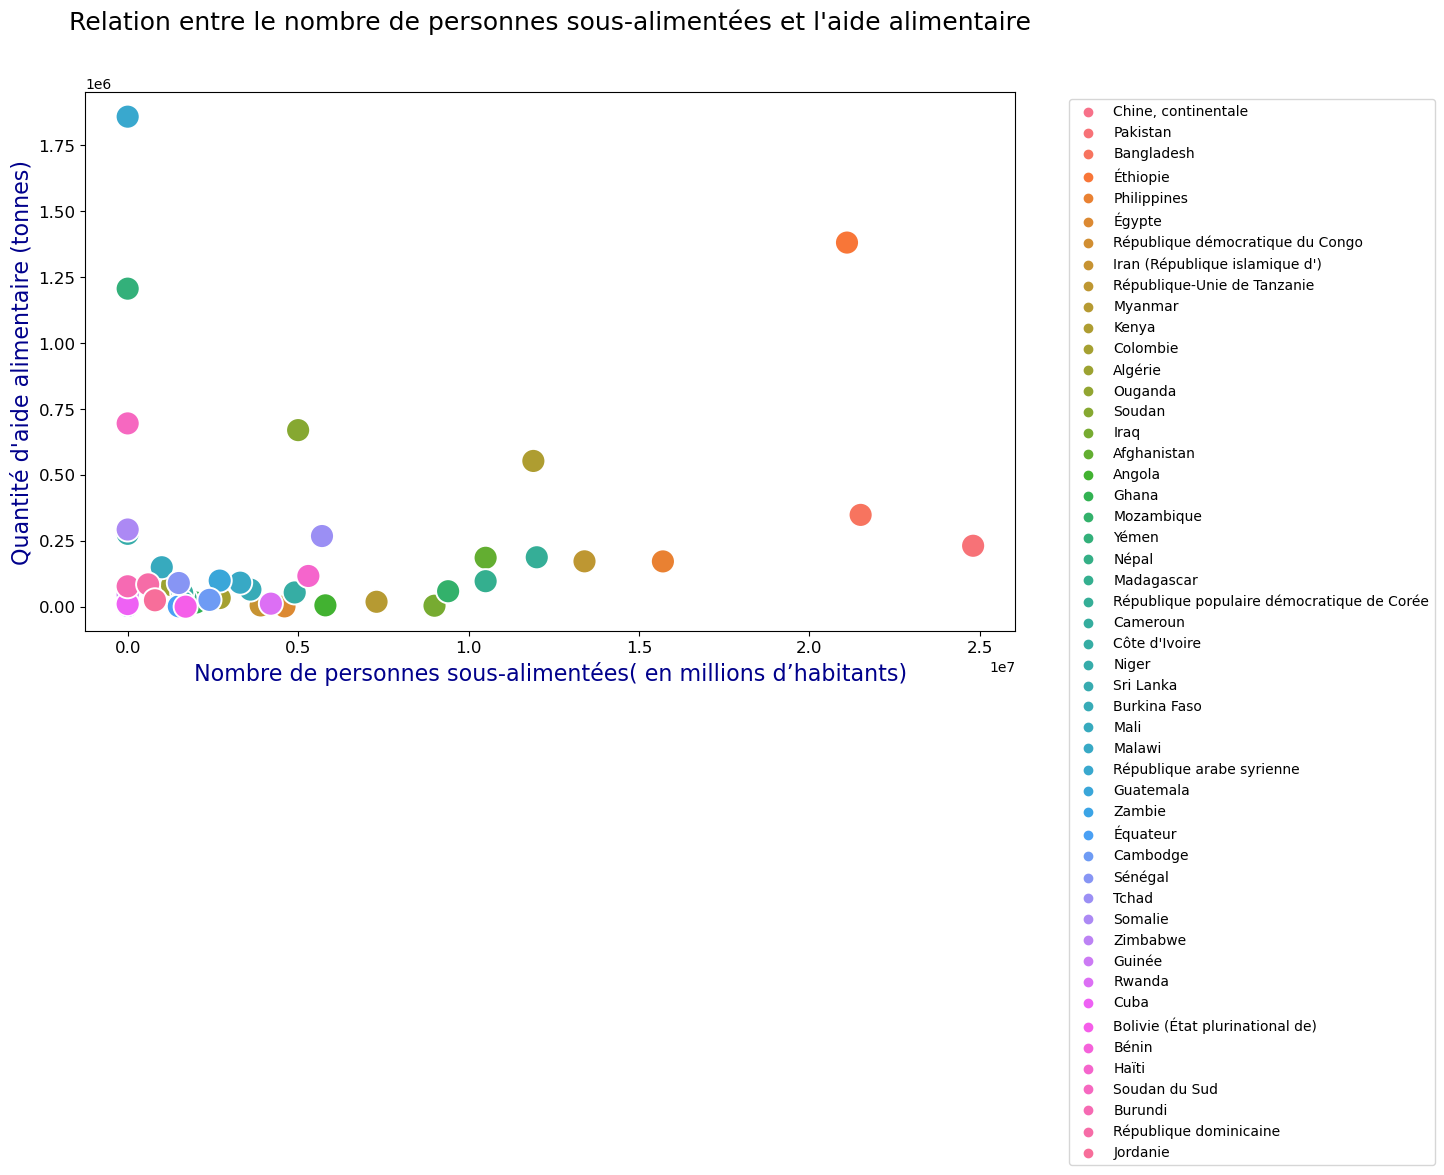

In [70]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='sous_nutrition', y = 'Aide_en_tonne', data = info_sn_aides, hue = 'Pays', s =300)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel(" Nombre de personnes sous-alimentées( en millions d’habitants) ", fontsize = 16, color = 'darkblue')
plt.ylabel("Quantité d'aide alimentaire (tonnes)", fontsize = 16, color = 'darkblue')
plt.title("Relation entre le nombre de personnes sous-alimentées et l'aide alimentaire", fontsize = 18, color = 'black', y =1.1)
plt.savefig("relation_sn_aides.png", dpi=200, bbox_inches = 'tight')
plt.tick_params(axis = "both", labelsize=12)

### Conclusion entre le nombre de personnes sous-alimentées et l'aide alimentaire

#### On voit clairement une corélation entre le nombre de personnes sous alimentées et la quantité d'aide alimentaire
Plus le nombre de personne sous alimentées est important plus l'aide est concéquente